In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/Google Colab Notebooks/Mini Sem 8/dataset/large sample/reliance_2years_60min.csv')

In [3]:
print(raw_data.shape)
raw_data.head()

(3037, 7)


,Unnamed: 0,open,high,low,close,volume,time
0,0,1369.099976,1377.800049,1356.550049,1370.000000,1971498,2020-04-23 03:45:00
1,1,1370.000000,1372.500000,1356.449951,1359.599976,4417574,2020-04-23 04:45:00
2,2,1359.000000,1367.449951,1353.849976,1365.050049,2826126,2020-04-23 05:45:00
3,3,1365.000000,1385.750000,1362.500000,1376.300049,5257084,2020-04-23 06:45:00
4,4,1376.699951,1377.800049,1360.099976,1373.900024,4124412,2020-04-23 07:45:00


In [4]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

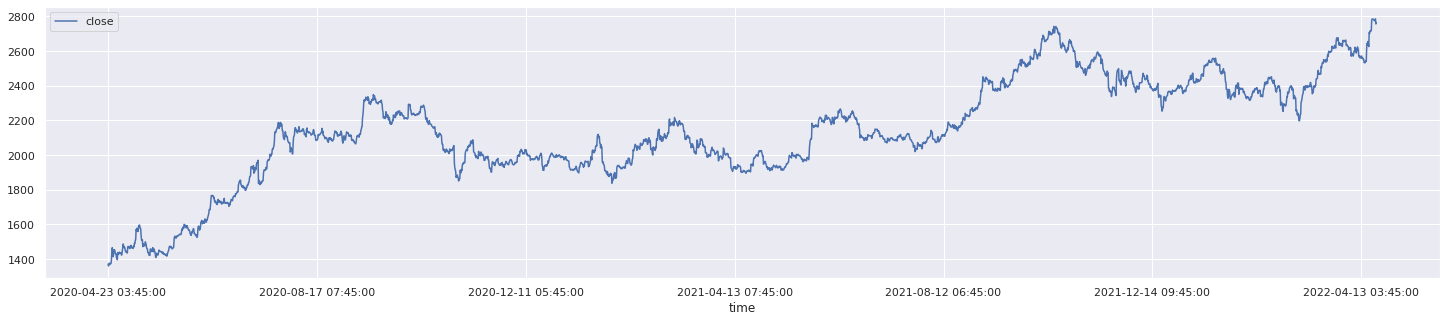

In [5]:
close_ds.plot(x='time', y='close', figsize=(25, 5))

In [6]:
# ema and vwap

from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier 
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)  
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):
  
  time_format = "%Y-%m-%d %H:%M:%S"
  
  sum_pv = 0
  sum_volume = 0
  
  vwap = []
  
  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):
    
    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [7]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 3037
 Days 10 
 Length of prices 3037
 Length of EMA list 3027
len ema = 3027
len vwap = 3037


In [8]:
# make all ema, vwap, prices lists of equal length 
price = price[-len(ema):]
vwap = vwap[-len(ema):]

No handles with labels found to put in legend.


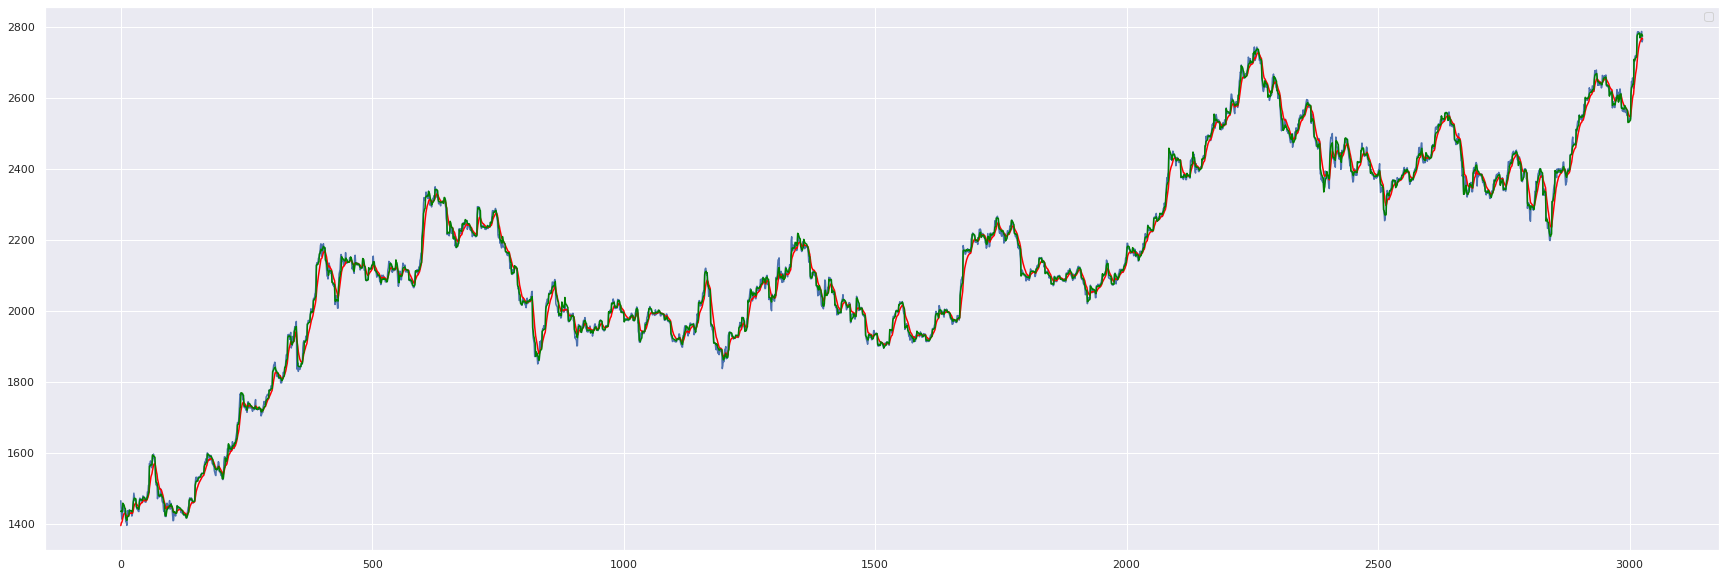

In [9]:
plt.figure(figsize=(30,10))

plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend()
plt.show()

In [10]:

# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [11]:

ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[1395.07410889 1435.15729957 1465.        ]
 [1402.47882524 1436.79016276 1435.80004883]
 [1404.46449782 1434.26341944 1413.40002441]
 ...
 [2767.89703307 2779.27396716 2786.39990234]
 [2765.88849936 2775.20206099 2756.85009766]
 [2765.36331766 2773.29525357 2763.        ]]


In [12]:
n_steps = 3 
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(3025, 3, 3) (3025,)
[[1395.07410889 1435.15729957 1465.        ]
 [1402.47882524 1436.79016276 1435.80004883]
 [1404.46449782 1434.26341944 1413.40002441]] 1413.4000244140625


In [13]:
# train_test_split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(2117, 3, 3)
(2117,)
(908, 3, 3)
(908,)


In [ ]:
# flattening input for model feeding 

# n_input = X_train.shape[1] * X_train.shape[2]
# X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
# X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)

(2117, 9)
(908, 9)


In [18]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional

# Vanilla LSTM

model_lstm_vanilla = Sequential()
model_lstm_vanilla.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_vanilla.add(Dense(1))
model_lstm_vanilla.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_lstm_vanilla.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10800     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
# Stacked LSTM

model_lstm_stacked = Sequential()
model_lstm_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_stacked.add(LSTM(50, activation='relu'))
model_lstm_stacked.add(Dense(1))
model_lstm_stacked.compile(optimizer=keras.optimizers.Adam(lr=0.0003), loss='mse')
model_lstm_stacked.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 50)             10800     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
# Bidirectional LSTM

model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_bidirectional.add(Dense(1))
model_lstm_bidirectional.compile(optimizer=keras.optimizers.Adam(lr=0.0003), loss='mse')
model_lstm_bidirectional.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              21600     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
lstm_vanilla_history = model_lstm_vanilla.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
67/67 - 6s - loss: 4079695.2500 - val_loss: 5247420.0000 - 6s/epoch - 97ms/step
Epoch 2/50
67/67 - 1s - loss: 3029257.5000 - val_loss: 3815701.2500 - 809ms/epoch - 12ms/step
Epoch 3/50
67/67 - 1s - loss: 1710034.5000 - val_loss: 1266815.0000 - 814ms/epoch - 12ms/step
Epoch 4/50
67/67 - 1s - loss: 426544.3438 - val_loss: 212864.8750 - 871ms/epoch - 13ms/step
Epoch 5/50
67/67 - 1s - loss: 53478.0977 - val_loss: 13508.7334 - 879ms/epoch - 13ms/step
Epoch 6/50
67/67 - 1s - loss: 2958.8350 - val_loss: 914.7773 - 788ms/epoch - 12ms/step
Epoch 7/50
67/67 - 1s - loss: 546.5040 - val_loss: 643.6261 - 828ms/epoch - 12ms/step
Epoch 8/50
67/67 - 1s - loss: 505.6147 - val_loss: 642.2503 - 882ms/epoch - 13ms/step
Epoch 9/50
67/67 - 1s - loss: 505.0655 - val_loss: 642.0042 - 767ms/epoch - 11ms/step
Epoch 10/50
67/67 - 1s - loss: 504.7926 - val_loss: 642.1760 - 857ms/epoch - 13ms/step
Epoch 11/50
67/67 - 2s - loss: 504.7024 - val_loss: 641.9743 - 2s/epoch - 23ms/step
Epoch 12/50
67/67 - 2s 

In [22]:
lstm_stacked_history = model_lstm_stacked.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
67/67 - 4s - loss: 2588429.7500 - val_loss: 1487925.3750 - 4s/epoch - 64ms/step
Epoch 2/50
67/67 - 2s - loss: 240094.9375 - val_loss: 2938.5417 - 2s/epoch - 23ms/step
Epoch 3/50
67/67 - 1s - loss: 392.3321 - val_loss: 237.7489 - 1s/epoch - 20ms/step
Epoch 4/50
67/67 - 1s - loss: 196.2885 - val_loss: 372.0230 - 1s/epoch - 22ms/step
Epoch 5/50
67/67 - 1s - loss: 186.4427 - val_loss: 328.9664 - 1s/epoch - 21ms/step
Epoch 6/50
67/67 - 1s - loss: 203.0495 - val_loss: 333.9479 - 1s/epoch - 21ms/step
Epoch 7/50
67/67 - 1s - loss: 310.5249 - val_loss: 282.1900 - 1s/epoch - 21ms/step
Epoch 8/50
67/67 - 1s - loss: 178.9151 - val_loss: 451.7310 - 1s/epoch - 22ms/step
Epoch 9/50
67/67 - 1s - loss: 189.2051 - val_loss: 259.7377 - 1s/epoch - 21ms/step
Epoch 10/50
67/67 - 2s - loss: 188.2384 - val_loss: 231.2628 - 2s/epoch - 24ms/step
Epoch 11/50
67/67 - 1s - loss: 198.8641 - val_loss: 411.0506 - 1s/epoch - 22ms/step
Epoch 12/50
67/67 - 1s - loss: 292.0373 - val_loss: 266.9882 - 1s/epoch -

In [23]:
lstm_bidirectional_history = model_lstm_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
67/67 - 5s - loss: 4222434.0000 - val_loss: 4839728.0000 - 5s/epoch - 70ms/step
Epoch 2/50
67/67 - 1s - loss: 2384357.5000 - val_loss: 2308761.2500 - 1s/epoch - 20ms/step
Epoch 3/50
67/67 - 1s - loss: 949693.5625 - val_loss: 707328.3125 - 1s/epoch - 19ms/step
Epoch 4/50
67/67 - 1s - loss: 217429.7188 - val_loss: 86135.4453 - 1s/epoch - 19ms/step
Epoch 5/50
67/67 - 1s - loss: 18609.3105 - val_loss: 3227.7000 - 1s/epoch - 19ms/step
Epoch 6/50
67/67 - 1s - loss: 717.7342 - val_loss: 358.6440 - 1s/epoch - 20ms/step
Epoch 7/50
67/67 - 1s - loss: 264.9063 - val_loss: 330.0646 - 1s/epoch - 19ms/step
Epoch 8/50
67/67 - 1s - loss: 262.8208 - val_loss: 329.9651 - 1s/epoch - 19ms/step
Epoch 9/50
67/67 - 1s - loss: 262.8194 - val_loss: 329.9994 - 1s/epoch - 18ms/step
Epoch 10/50
67/67 - 1s - loss: 262.7087 - val_loss: 329.9535 - 1s/epoch - 21ms/step
Epoch 11/50
67/67 - 1s - loss: 262.8037 - val_loss: 329.9470 - 1s/epoch - 19ms/step
Epoch 12/50
67/67 - 1s - loss: 262.6078 - val_loss: 329

Text(0, 0.5, 'MSE')

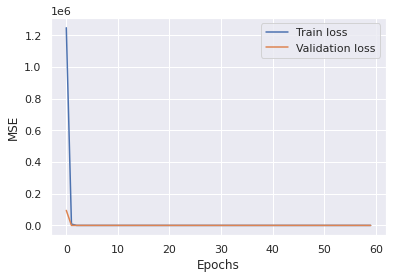

In [ ]:
# plots 
fig = plt.figure()
plt.plot(lstm_vanilla_history.history['loss'], label='Train loss')
plt.plot(lstm_vanilla_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

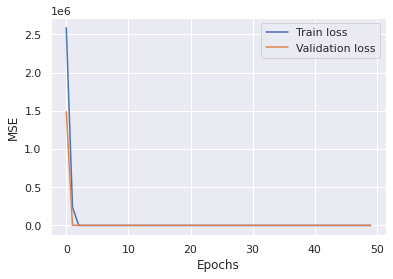

In [24]:
# plots 
fig = plt.figure()
plt.plot(lstm_stacked_history.history['loss'], label='Train loss')
plt.plot(lstm_stacked_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

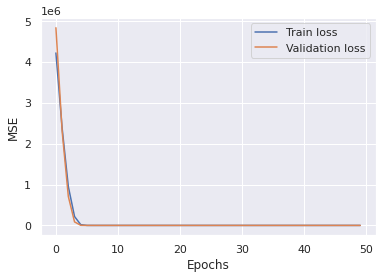

In [25]:
# plots 
fig = plt.figure()
plt.plot(lstm_bidirectional_history.history['loss'], label='Train loss')
plt.plot(lstm_bidirectional_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [26]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_vanilla_train_pred = model_lstm_vanilla.predict(X_train)
lstm_vanilla_test_pred = model_lstm_vanilla.predict(X_test)
print('Train rmse for vanilla:', np.sqrt(mean_squared_error(y_train, lstm_vanilla_train_pred)))
print('Validation rmse for vanilla:', np.sqrt(mean_squared_error(y_test, lstm_vanilla_test_pred)))


lstm_stacked_train_pred = model_lstm_stacked.predict(X_train)
lstm_stacked_test_pred = model_lstm_stacked.predict(X_test)
print('Train rmse for stacked:', np.sqrt(mean_squared_error(y_train, lstm_stacked_train_pred)))
print('Validation rmse for stacked:', np.sqrt(mean_squared_error(y_test, lstm_stacked_test_pred)))


lstm_bidirectional_train_pred = model_lstm_bidirectional.predict(X_train)
lstm_bidirectional_test_pred = model_lstm_bidirectional.predict(X_test)
print('Train rmse for bidirectional:', np.sqrt(mean_squared_error(y_train, lstm_bidirectional_train_pred)))
print('Validation rmse for bidirectional:', np.sqrt(mean_squared_error(y_test, lstm_bidirectional_test_pred)))

Train rmse for vanilla: 22.33100529015709
Validation rmse for vanilla: 25.28678498660547
Train rmse for stacked: 11.775714356595891
Validation rmse for stacked: 14.68185110930564
Train rmse for bidirectional: 16.179604393644222
Validation rmse for bidirectional: 18.166411200457997


In [18]:
print(y_test[0:10])
print(lstm_vanilla_test_pred[0:10])

[2369.60009766 2386.5        2380.         2378.5        2380.69995117
 2376.30004883 2382.         2373.30004883 2422.19995117 2424.94995117]
[[2371.4001]
 [2376.8982]
 [2387.1538]
 [2384.2185]
 [2383.3137]
 [2384.365 ]
 [2381.2236]
 [2385.1648]
 [2388.4072]
 [2417.0403]]


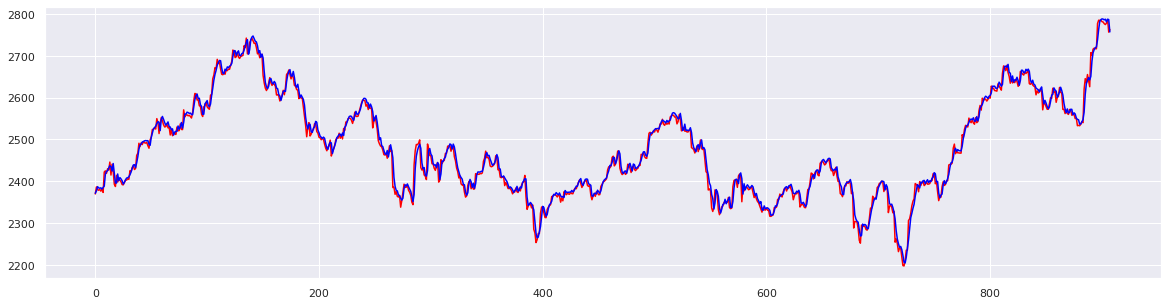

In [19]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(20, 5))
plt.plot(pd.Series(y_test), color='red')
plt.plot(pd.Series(lstm_vanilla_test_pred.flatten()), color='blue')

In [27]:
# MAPE calculation
from sklearn.metrics import mean_absolute_percentage_error
print('Train MAPE for vanilla:', mean_absolute_percentage_error(y_train, lstm_vanilla_train_pred))
print('Validation MAPE for vanilla:', mean_absolute_percentage_error(y_test, lstm_vanilla_test_pred))

print('Train MAPE stacked:', mean_absolute_percentage_error(y_train, lstm_stacked_train_pred))
print('Validation MAPE stacked:', mean_absolute_percentage_error(y_test, lstm_stacked_test_pred))

print('Train MAPE bidirectional:', mean_absolute_percentage_error(y_train, lstm_bidirectional_train_pred))
print('Validation MAPE bidirectional:', mean_absolute_percentage_error(y_test, lstm_bidirectional_test_pred))

Train MAPE for vanilla: 0.008227209340709267
Validation MAPE for vanilla: 0.00783123610868906
Train MAPE stacked: 0.004321641364963578
Validation MAPE stacked: 0.004652193457591161
Train MAPE bidirectional: 0.005866924587225435
Validation MAPE bidirectional: 0.005542125845353501


In [ ]:
# classification accuracy 

# # y_test_flattened = y_test.values.flatten()
# cnn_test_pred_flattened = cnn_test_pred.flatten()
# total_number_of_samples = len(y_test)
# no_of_features = X_test.shape[2]
# no_of_correct_predictions = 0
# for i in range(0, total_number_of_samples):
#     prev_value = X_test[i][n_steps-1][no_of_features-1]
#     actual_value = y_test[i]
#     predicted_value = cnn_test_pred_flattened[i]
#     print(f'i = {i}, prev_val = {prev_value}, actual = {actual_value}, pred = {predicted_value}')
#     if ((prev_value > actual_value and prev_value > predicted_value) or (prev_value < actual_value and prev_value < predicted_value)):
#         no_of_correct_predictions += 1

# print(f'Accuracy of correct trend prediction = {no_of_correct_predictions / total_number_of_samples}');
